In [258]:
import pandas as pd
import xarray as xr
from fos import util
from fos.data import snotelmeta 
import datetime
import os
import numpy as np
from fos.util import get_wrf_data_points

## 
def wrfread(datadir, gcm, exp, variant, domain, var):
    modeldir = datadir + gcm + '/postprocess/'+domain + '/'
    all_files = sorted(os.listdir(modeldir))
    read_files = []
    for ii in all_files:
        if (
            ii.startswith(var + ".")
            and model in ii
            and variant in ii
            and domain in ii
        ):
            if domain in ii:
                read_files.append(os.path.join(modeldir, str(ii)))
    assert len(read_files) > 0, f"No matching files found in {modeldir}"

    del all_files

    data = xr.open_mfdataset(read_files, combine="by_coords")
    var_read = data.variables[var]

    dates = []
    for val in data["day"].data:
        try:
            dates.append(datetime.datetime.strptime(str(val)[0:-2], "%Y%m%d").date())
        except ValueError:
            dates.append(datetime.datetime(int(str(val)[0:4]), int(str(val)[4:6]), 28))


    var_read = xr.DataArray(var_read, dims=["day", "lat2d", "lon2d"])
    var_read["day"] = dates
    return var_read

## load data  
var = 'snow'
modeldir = '/glade/campaign/uwyo/wyom0112/postprocess/'
model = 'ukesm1-0-ll'
variant = 'r2i1p1f2'
domain = 'd02'
basedir = '/glade/u/home/mcowherd/'
projectdir = basedir + 'fos-data/'
snoteldir = projectdir + 'snoteldata/'
wrfdir = '/glade/campaign/uwyo/wyom0112/postprocess/'
wrfcoorddir = projectdir 

## LOAD DATA ## 
mod_historical = model +'_'+ variant + '_historical_bc'
mod_future = model +'_' + variant+ '_ssp370_bc'
gcm = mod_historical
date_start_pd, date_end_pd = [1980, 1, 1], [2013, 12, 31]  # 30 years, historical
exp = "hist"
var_wrf = wrfread(modeldir, gcm, exp, variant, domain, var)
var_wrf = util.screen_times_wrf(var_wrf, date_start_pd, date_end_pd)

# future dates
date_start_pd, date_end_pd = [2014, 1, 1], [2100, 12, 31]
gcm = mod_future
model = "ssp370"
var_wrf_ssp370 = wrfread(modeldir, gcm, model, variant, domain, var)
var_wrf_ssp370 = util.screen_times_wrf(var_wrf_ssp370, date_start_pd, date_end_pd)
wrfdata = [var_wrf, var_wrf_ssp370]
swe = xr.concat([var_wrf, var_wrf_ssp370], dim = 'day')
swe = swe.to_dataset(name = 'swe')

from fos.data import snotel_no_ak

coords = util.get_coords(wrfcoorddir+'/wrf_coordinates')

lon_wrf = coords['lon2d']
lat_wrf = coords['lat2d']

subregions = ["SW","SCR","NCR","PNW","ALL"]
bound_arrays = [[35., 42., -121., -114.],
               [35., 42., -114., -105.],
               [42., 49., -117., -107.],
               [42., 49., -125., -117.],
               [35,49,-125,-105]]
start_dates = [[1980,9,1],[2030,9,1],[2070,9,1]]
end_dates = [[2010,9,1],[2060,9,1],[2100,9,1]]

In [157]:
## load data  
var = 'prec'
modeldir = '/glade/campaign/uwyo/wyom0112/postprocess/'
model = 'ukesm1-0-ll'
variant = 'r2i1p1f2'
domain = 'd02'
basedir = '/glade/u/home/mcowherd/'
projectdir = basedir + 'fos-data/'
snoteldir = projectdir + 'snoteldata/'
wrfdir = '/glade/campaign/uwyo/wyom0112/postprocess/'
wrfcoorddir = projectdir 

## LOAD DATA ## 
mod_historical = model +'_'+ variant + '_historical_bc'
mod_future = model +'_' + variant+ '_ssp370_bc'
gcm = mod_historical
date_start_pd, date_end_pd = [1980, 1, 1], [2013, 12, 31]  # 30 years, historical
exp = "hist"
var_wrf = wrfread(modeldir, gcm, exp, variant, domain, var)
var_wrf = util.screen_times_wrf(var_wrf, date_start_pd, date_end_pd)
# future dates
date_start_pd, date_end_pd = [2014, 1, 1], [2100, 12, 31]
gcm = mod_future
model = "ssp370"
var_wrf_ssp370 = wrfread(modeldir, gcm, model, variant, domain, var)
var_wrf_ssp370 = util.screen_times_wrf(var_wrf_ssp370, date_start_pd, date_end_pd)
wrfdata = [var_wrf, var_wrf_ssp370]
prec = xr.concat([var_wrf, var_wrf_ssp370], dim = 'day')
prec = prec.to_dataset(name = 'prec')

In [92]:
## load data  
var = 't2'
domain = "d02"

## LOAD DATA ## 
mod_historical = model +'_'+ variant + '_historical_bc'
mod_future = model +'_' + variant+ '_ssp370_bc'
gcm = mod_historical
date_start_pd, date_end_pd = [1980, 1, 1], [2013, 12, 31]  # 30 years, historical
exp = "hist"
var_wrf = wrfread(modeldir, gcm, exp, variant, domain, var)
var_wrf = util.screen_times_wrf(var_wrf, date_start_pd, date_end_pd)

# future dates
date_start_pd, date_end_pd = [2014, 1, 1], [2100, 12, 31]
gcm = mod_future
model = "ssp370"
var_wrf_ssp370 = wrfread(modeldir, gcm, model, variant, domain, var)
var_wrf_ssp370 = util.screen_times_wrf(var_wrf_ssp370, date_start_pd, date_end_pd)
wrfdata = [var_wrf, var_wrf_ssp370]
t2 = xr.concat([var_wrf, var_wrf_ssp370], dim = 'day')
t2 = t2.to_dataset(name = 't2')


In [158]:
## load data  
var = 't2'
domain = "d01"
modeldir = '/glade/campaign/uwyo/wyom0112/postprocess/'
model = 'ukesm1-0-ll'
variant = 'r2i1p1f2'
domain = 'd02'
basedir = '/glade/u/home/mcowherd/'
projectdir = basedir + 'fos-data/'
snoteldir = projectdir + 'snoteldata/'
wrfdir = '/glade/campaign/uwyo/wyom0112/postprocess/'
wrfcoorddir = projectdir 

## LOAD DATA ## 
mod_historical = model +'_'+ variant + '_historical_bc'
mod_future = model +'_' + variant+ '_ssp370_bc'
gcm = mod_historical
date_start_pd, date_end_pd = [1980, 1, 1], [2013, 12, 31]  # 30 years, historical
exp = "hist"
var_wrf = wrfread(modeldir, gcm, exp, variant, domain, var)
var_wrf = util.screen_times_wrf(var_wrf, date_start_pd, date_end_pd)

# future dates
date_start_pd, date_end_pd = [2014, 1, 1], [2100, 12, 31]
gcm = mod_future
model = "ssp370"
var_wrf_ssp370 = wrfread(modeldir, gcm, model, variant, domain, var)
var_wrf_ssp370 = util.screen_times_wrf(var_wrf_ssp370, date_start_pd, date_end_pd)
wrfdata = [var_wrf, var_wrf_ssp370]
t21 = xr.concat([var_wrf, var_wrf_ssp370], dim = 'day')
t21 = t21.to_dataset(name = 't2')


In [160]:
## load data  
var = 'prec'
modeldir = '/glade/campaign/uwyo/wyom0112/postprocess/'
model = 'ukesm1-0-ll'
variant = 'r2i1p1f2'
basedir = '/glade/u/home/mcowherd/'
projectdir = basedir + 'fos-data/'
snoteldir = projectdir + 'snoteldata/'
wrfdir = '/glade/campaign/uwyo/wyom0112/postprocess/'
wrfcoorddir = projectdir 
domain = 'd01'

## LOAD DATA ## 
mod_historical = model +'_'+ variant + '_historical_bc'
mod_future = model +'_' + variant+ '_ssp370_bc'
gcm = mod_historical
date_start_pd, date_end_pd = [1980, 1, 1], [2013, 12, 31]  # 30 years, historical
exp = "hist"
var_wrf = wrfread(modeldir, gcm, exp, variant, domain, var)
var_wrf = util.screen_times_wrf(var_wrf, date_start_pd, date_end_pd)
# future dates
date_start_pd, date_end_pd = [2014, 1, 1], [2100, 12, 31]
gcm = mod_future
model = "ssp370"
var_wrf_ssp370 = wrfread(modeldir, gcm, model, variant, domain, var)
var_wrf_ssp370 = util.screen_times_wrf(var_wrf_ssp370, date_start_pd, date_end_pd)
wrfdata = [var_wrf, var_wrf_ssp370]
prec1 = xr.concat([var_wrf, var_wrf_ssp370], dim = 'day')
prec1 = prec1.to_dataset(name = 'prec')

In [259]:
coords2 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d02')
coords4 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d04')
coords3 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d03')

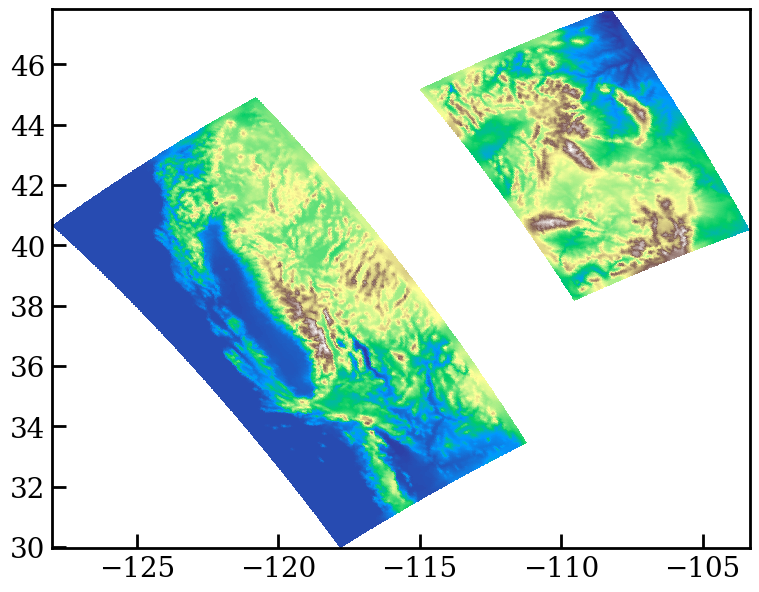

In [170]:
fig,ax=plt.subplots()
ax.pcolormesh(coords3['XLONG'][0], coords3['XLAT'][0], coords3['HGT'][0], cmap = cm.terrain)
ax.pcolormesh(coords4['XLONG'][0], coords4['XLAT'][0], coords4['HGT'][0], cmap = cm.terrain)
plt.show()

In [186]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
plt.style.use('style.mplstyle')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
huc2 = gpd.read_file('/glade/u/home/mcowherd/fos-data/spatialdata/huc2.shp')

In [187]:
huc2 = gpd.read_file('/glade/u/home/mcowherd/fos-data/spatialdata/huc2.shp')

In [2]:
domain = 'd02'
infile = os.path.join('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new', f"wrfinput_{domain}")
data = xr.open_dataset(infile, engine="netcdf4")
lat = data.variables["XLAT"]
lon = data.variables["XLONG"]
z = data.variables["HGT"]
day = var_wrf['day']

In [97]:
y1 = 1980
day_start = f"{y1}-10-01"
day_end = f"{y1+10}-09-30"
swe_sorted = swe.sortby('day')
prec_sorted = prec.sortby('day')
t2_sorted = t2.sortby('day')
day_start = np.datetime64(day_start)
day_end = np.datetime64(day_end)
# Select the subset of the dataset within the day range
subset = swe_sorted.sel(day=slice(day_start, day_end))
max_swe = subset["swe"].max(dim="day").compute()
subset = prec_sorted.sel(day=slice(day_start, day_end))
mean_prec = subset["prec"].mean(dim="day").compute()
subset = t2_sorted.sel(day=slice(day_start, day_end))
mean_t2 = subset["t2"].mean(dim="day").compute()


In [ ]:
import glob
subbasins = gpd.read_file('/glade/u/home/mcowherd/fos-data/eastriver/subbasins.shp').to_crs('epsg:4326')
asodatapath = '/glade/u/home/mcowherd/ASO/'
ncfiles50 = glob.glob(asodatapath + '*swe*50m_rp.nc')
fn = ncfiles50[0]
asoswe = xr.open_dataset(fn)

In [264]:
swe

<xarray.Dataset>
Dimensions:  (day: 42930, lat2d: 340, lon2d: 270)
Coordinates:
  * day      (day) datetime64[ns] 1980-09-01 1980-09-02 ... 2100-08-30
Dimensions without coordinates: lat2d, lon2d
Data variables:
    swe      (day, lat2d, lon2d) float32 dask.array<chunksize=(360, 340, 270), meta=np.ndarray>

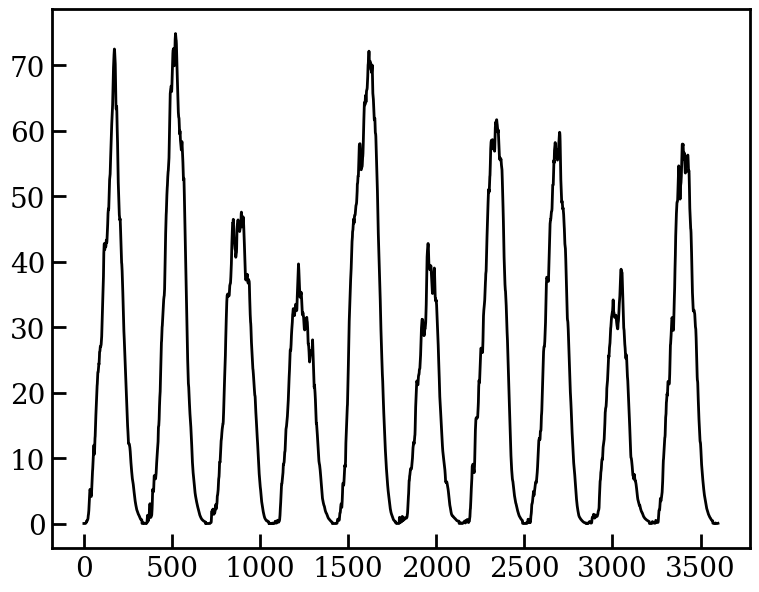

In [46]:
plt.plot(subset['swe'].mean(dim = ['lat2d', 'lon2d']))

In [251]:
from matplotlib import cm
## data, colormap, index, vmin, vmax
data = {'swe': [max_swe, cm.Blues, 0, 5, 600, 'ASOSWE'],
        'prec': [mean_prec, cm.magma, 1, 0.1, 1.9,'SAIL_prec'],
        'temp': [mean_t2, cm.seismic, 2, 268,285,'SAIL_temp'],
       }
data2 = {'ASOSWE': [[asoswe.lon, asoswe.lat, asoswe['Band1']], {'cmap':'Blues', 'vmin':0, 'vmax':3}],
        'SAIL_prec': [[asoswe.lon, asoswe.lat, None], {'cmap':'magma', 'vmin':0, 'vmax':3}],
        'SAIL_temp': [[asoswe.lon, asoswe.lat, None], {'cmap':'seismic', 'vmin':0, 'vmax':3}]}

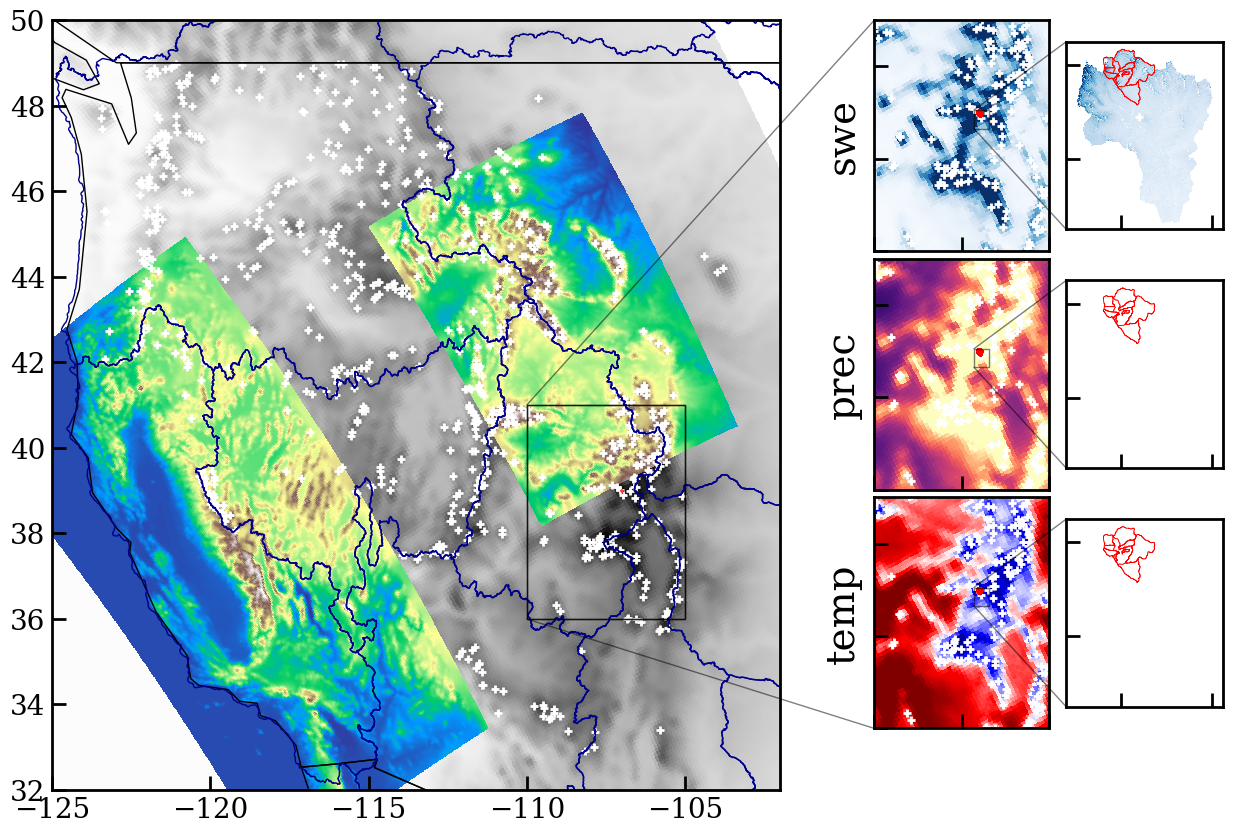

In [274]:
fig,ax = plt.subplots(figsize=(10,10))
sncolor='white'
bacolor = 'red'

ax.pcolormesh(lon[0], lat[0], z[0], cmap = mpl.cm.Greys)

ax.pcolormesh(coords3['XLONG'][0], coords3['XLAT'][0], coords3['HGT'][0], cmap = cm.terrain)
ax.pcolormesh(coords4['XLONG'][0], coords4['XLAT'][0], coords4['HGT'][0], cmap = cm.terrain)


world.boundary.plot(ax=ax, linewidth =1 )
snotel_no_ak.plot(ax=ax, marker = '+', color = sncolor)
subbasins.plot(ax=ax, color = bacolor , linewidth = 50)
huc2.boundary.plot(ax=ax, linewidth = 1, color = 'darkblue')
x12, x22, y12, y22 = -107.15, -106.72, 38.65, 39.05
x1, x2, y1, y2 = -110, -105, 36 ,41 

for key, info in data.items():
    dataset = info[0]
    cmap = info[1]
    idx = info[2]
    vmin = info[3]
    vmax = info[4]
    arg = info[5]
    axins = ax.inset_axes([1.1, 0.7 - 0.31 * idx, 0.3, 0.3])
    axins.pcolormesh(lon[0], lat[0], dataset, cmap = cmap, vmin = vmin, vmax = vmax)
    subbasins.boundary.plot(ax=axins, color = bacolor)
    snotel_no_ak.plot(ax=axins, marker = '+',color = sncolor)
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticklabels([])
    axins.set_yticklabels([])
    a,b = ax.indicate_inset_zoom(axins, edgecolor="black")  
    for line in b:
        line.set(visible = False)
    if idx == 0:
        b[1].set(visible = True)
    if idx == 2:
        b[0].set(visible = True)
    
    axins2 = axins.inset_axes([1.1, 0.05, 0.9, 0.9])
    if idx==0:
        axins2.pcolormesh(data2[arg][0][0],data2[arg][0][1],data2[arg][0][2], **data2[arg][1])
    snotel_no_ak.plot(ax=axins2, marker = '+',color = sncolor)
    axins2.set_xlim(x12, x22)
    axins2.set_ylim(y12, y22)
    axins2.set_xticklabels([])
    axins2.set_yticklabels([])
    a,b = axins.indicate_inset_zoom(axins2, edgecolor="black") 
    for line in b:
        line.set(visible = False)
    b[1].set(visible = True)
    b[0].set(visible = True)
    subbasins.boundary.plot(ax=axins2, color = 'red', linewidth = 0.5)



    axins.set_ylabel(key)


ax.set_xlim((-125,-102))
ax.set_ylim((32,50))
plt.show()

In [276]:
masks = xr.open_dataset('/glade/u/home/mcowherd/fate-of-snotels/data/basin_masks.nc')

In [277]:
masks

<xarray.Dataset>
Dimensions:      (basin: 118, lat: 340, lon: 270)
Coordinates:
  * basin        (basin) object 'Gunnison' 'Souris' ... 'Willamette' 'Niobrara'
    latitude     (lat, lon) float32 ...
    longitude    (lat, lon) float32 ...
Dimensions without coordinates: lat, lon
Data variables:
    basin_masks  (basin, lat, lon) float64 ...